In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
ruta_del_archivo = '/content/drive/MyDrive/IceCreamData.csv'
df = pd.read_csv(ruta_del_archivo)
print(df.to_string())

     Temperature      Revenue
0      24.566884   534.799028
1      26.005191   625.190122
2      27.790554   660.632289
3      20.595335   487.706960
4      11.503498   316.240194
5      14.352514   367.940744
6      13.707780   308.894518
7      30.833985   696.716640
8       0.976870    55.390338
9      31.669465   737.800824
10     11.455253   325.968408
11      3.664670    71.160153
12     18.811824   467.446707
13     13.624509   289.540934
14     39.539909   905.477604
15     18.483141   469.909033
16     25.935375   648.209998
17     42.515280   921.508275
18     29.589481   649.561175
19     21.775948   534.622865
20     25.457836   612.153949
21     15.214569   353.325633
22     22.619316   524.236115
23     16.258721   374.231135
24     23.881725   523.124547
25     18.978300   473.604335
26     15.661464   402.455320
27     29.185045   679.317791
28     19.024611   517.534028
29     35.120151   809.672053
30     24.183937   528.380417
31     15.231190   356.098007
32      8.

In [3]:
# Regrecion lineal simple

X = df[['Temperature']]
y = df['Revenue']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 652.5200612979734
R-squared: 0.9771532792713993


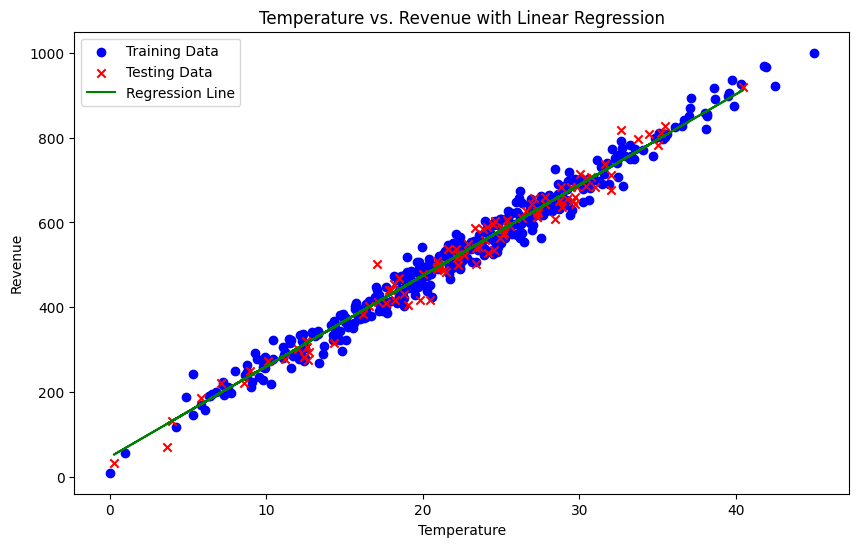

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, marker='o', color='blue', label='Training Data')
plt.scatter(X_test, y_test, marker='x', color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.title('Temperature vs. Revenue with Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

METODO MOORE-PENROSE

In [8]:
import pandas as pd
X = df[['Temperature']]
y = df['Revenue']

d = {"Temperature": X['Temperature'], "Revenue": y}
df = pd.DataFrame(d)
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [9]:
import numpy as np
df2=df.copy()
df2["y"]=np.ones(len(df))
df2

,Temperature,Revenue,y
0,24.566884,534.799028,1.0
1,26.005191,625.190122,1.0
2,27.790554,660.632289,1.0
3,20.595335,487.706960,1.0
4,11.503498,316.240194,1.0
...,...,...,...
495,22.274899,524.746364,1.0
496,32.893092,755.818399,1.0
497,12.588157,306.090719,1.0
498,22.362402,566.217304,1.0


In [10]:
X=np.array(df2)
X.shape

(500, 3)

In [11]:
Xpinv= np.linalg.pinv(X)
Xpinv.shape

(3, 500)

In [12]:
y = np.array(df[["Revenue"]])
y.shape

(500, 1)

In [13]:
betas = Xpinv @ y
print(betas.shape)
betas

(3, 1)


array([[2.39808173e-14],
       [1.00000000e+00],
       [1.42108547e-14]])

In [14]:
# Regrecion lineal multiple.
##Preparación de los datos: Cargar el conjunto de datos y seleccionar las variables independientes (features) y la variable dependiente (target) para la regresión lineal múltiple.
###División de datos: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
####Entrenamiento del modelo: Entrenar un modelo de regresión lineal múltiple utilizando los datos de entrenamiento.
#####Predicción: Realizar predicciones sobre el conjunto de prueba utilizando el modelo entrenado.
######Evaluación del modelo: Evaluar el rendimiento del modelo utilizando métricas apropiadas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
#Visualización (opcional): Visualizar los resultados si es posible (esto puede ser más complejo con múltiples variables).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/IceCreamData.csv')
X = df[['Temperature']]
y = df['Revenue']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 652.5200612979734
Coeficiente de determinación (R²): 0.9771532792713993


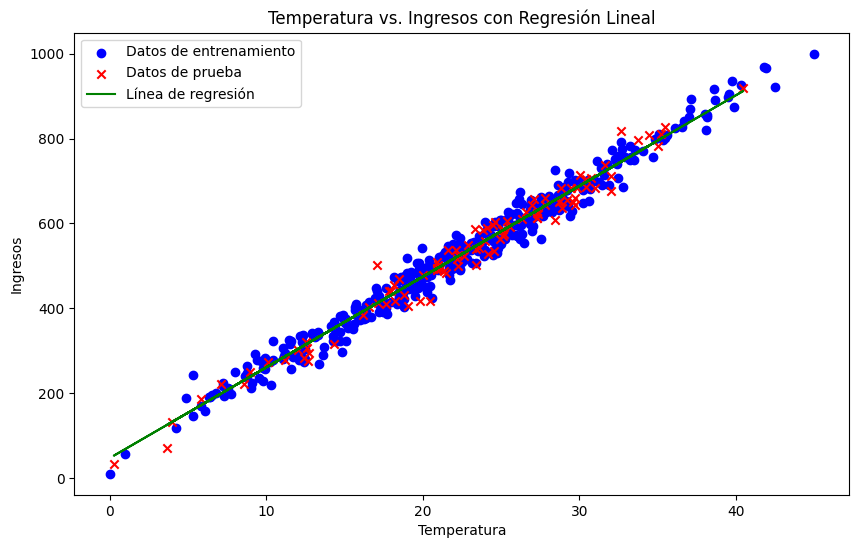

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, marker='o', color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, marker='x', color='red', label='Datos de prueba')
plt.plot(X_test, y_pred, color='green', label='Línea de regresión')
plt.title('Temperatura vs. Ingresos con Regresión Lineal')
plt.xlabel('Temperatura')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

In [22]:
# error cuadratico medio
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

## error cuadratico medio raiz
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

### error adsoluto medio
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) es: {mae}")

Mean Squared Error (MSE): 652.5200612979734
Root Mean Squared Error (RMSE): 25.544472225864705
Mean Absolute Error (MAE) es: 19.184547408370435


In [23]:
#Calcular error porcentual absoluto medio (MAPE)
import numpy as np

def calculate_mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Error porcentual absoluto medio (MAPE): {calculate_mape(y_test, y_pred)}%")


Error porcentual absoluto medio (MAPE): 5.086538627070513%


In [24]:
## error cuadratico
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 652.5200612979734
Root Mean Squared Error: 25.544472225864705


Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

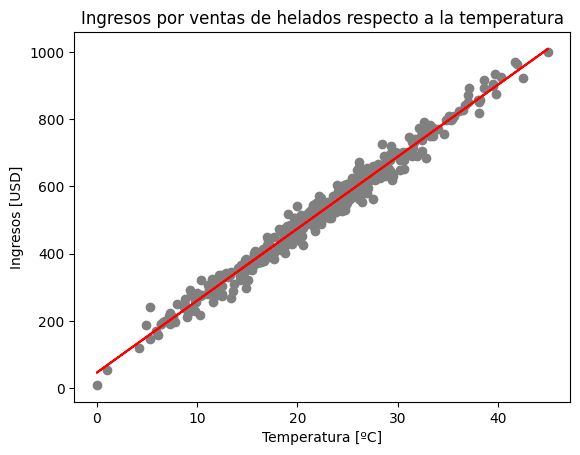

In [25]:
# Evaluación del modelo.
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')